In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from math import sqrt
from math import ceil
from imblearn.over_sampling import SMOTE
import numpy as np


regularized_linear_regression = pd.read_csv('/workspaces/regularized-linear-regression-project-omasss/demographic_health_data.csv')

df = regularized_linear_regression

df.head(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
5,1011,10138,1198,11.816926,1130,11.146183,1395,13.760110,1446,14.263168,...,873,20.6,19.4,21.9,1651,4.5,4.2,4.8,360,6
6,1013,19680,2351,11.946138,2461,12.505081,2286,11.615854,2337,11.875000,...,1741,18.6,17.5,19.5,2841,4.3,4.1,4.6,662,6
7,1015,114277,13141,11.499252,14637,12.808352,15463,13.531157,13865,12.132800,...,9158,14.7,13.6,15.7,13182,3.6,3.3,3.8,3204,4
8,1017,33615,3869,11.509743,3812,11.340176,4380,13.029897,3734,11.108136,...,2870,17.5,16.6,18.5,4664,4.0,3.8,4.2,1068,5
9,1019,26032,2554,9.811002,2981,11.451291,2852,10.955747,2504,9.618931,...,2540,15.9,14.7,17.2,3353,3.9,3.6,4.2,814,6


In [2]:
# Handling missing values
df = df.fillna(method='ffill')  # or choose an appropriate filling strategy

# Removing duplicates
df = df.drop_duplicates()

# Display the cleaned data
print(df.head())


   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2       

/tmp/ipykernel_1803/1819857813.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # or choose an appropriate filling strategy


               fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.

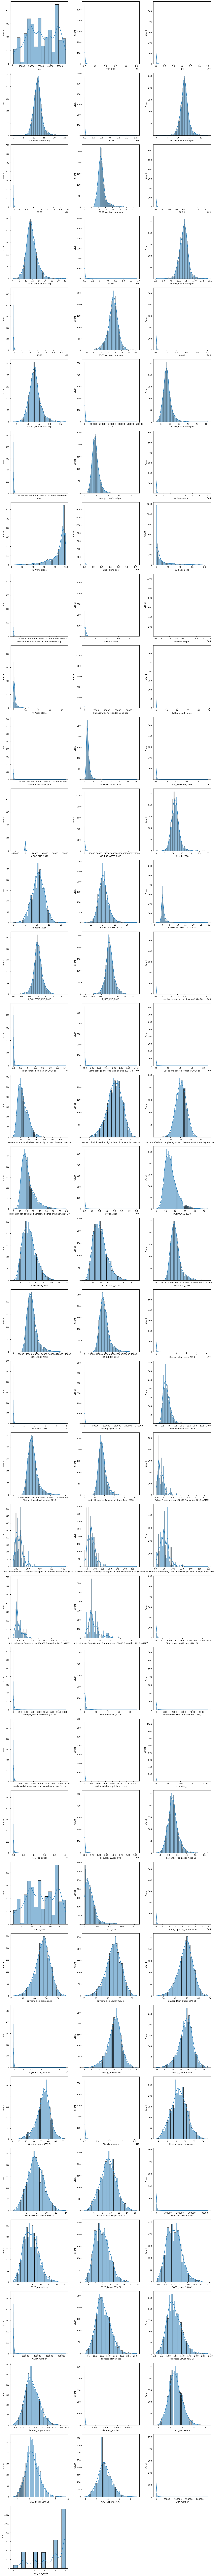

In [3]:
# Summary statistics
print(df.describe())

# Determine the number of subplots needed
num_features = df.select_dtypes(include=np.number).columns.size
num_columns = 3
num_rows = ceil(num_features / num_columns)

# Plotting distributions of features
plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of rows
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.histplot(df[col], kde=True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [4]:
# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encoding categorical variables
ohe = OneHotEncoder()
df_encoded = pd.DataFrame(ohe.fit_transform(df[categorical_cols]).toarray(), columns=ohe.get_feature_names_out(categorical_cols))

# Concatenate encoded categorical columns with the rest of the dataset
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), df_encoded], axis=1)



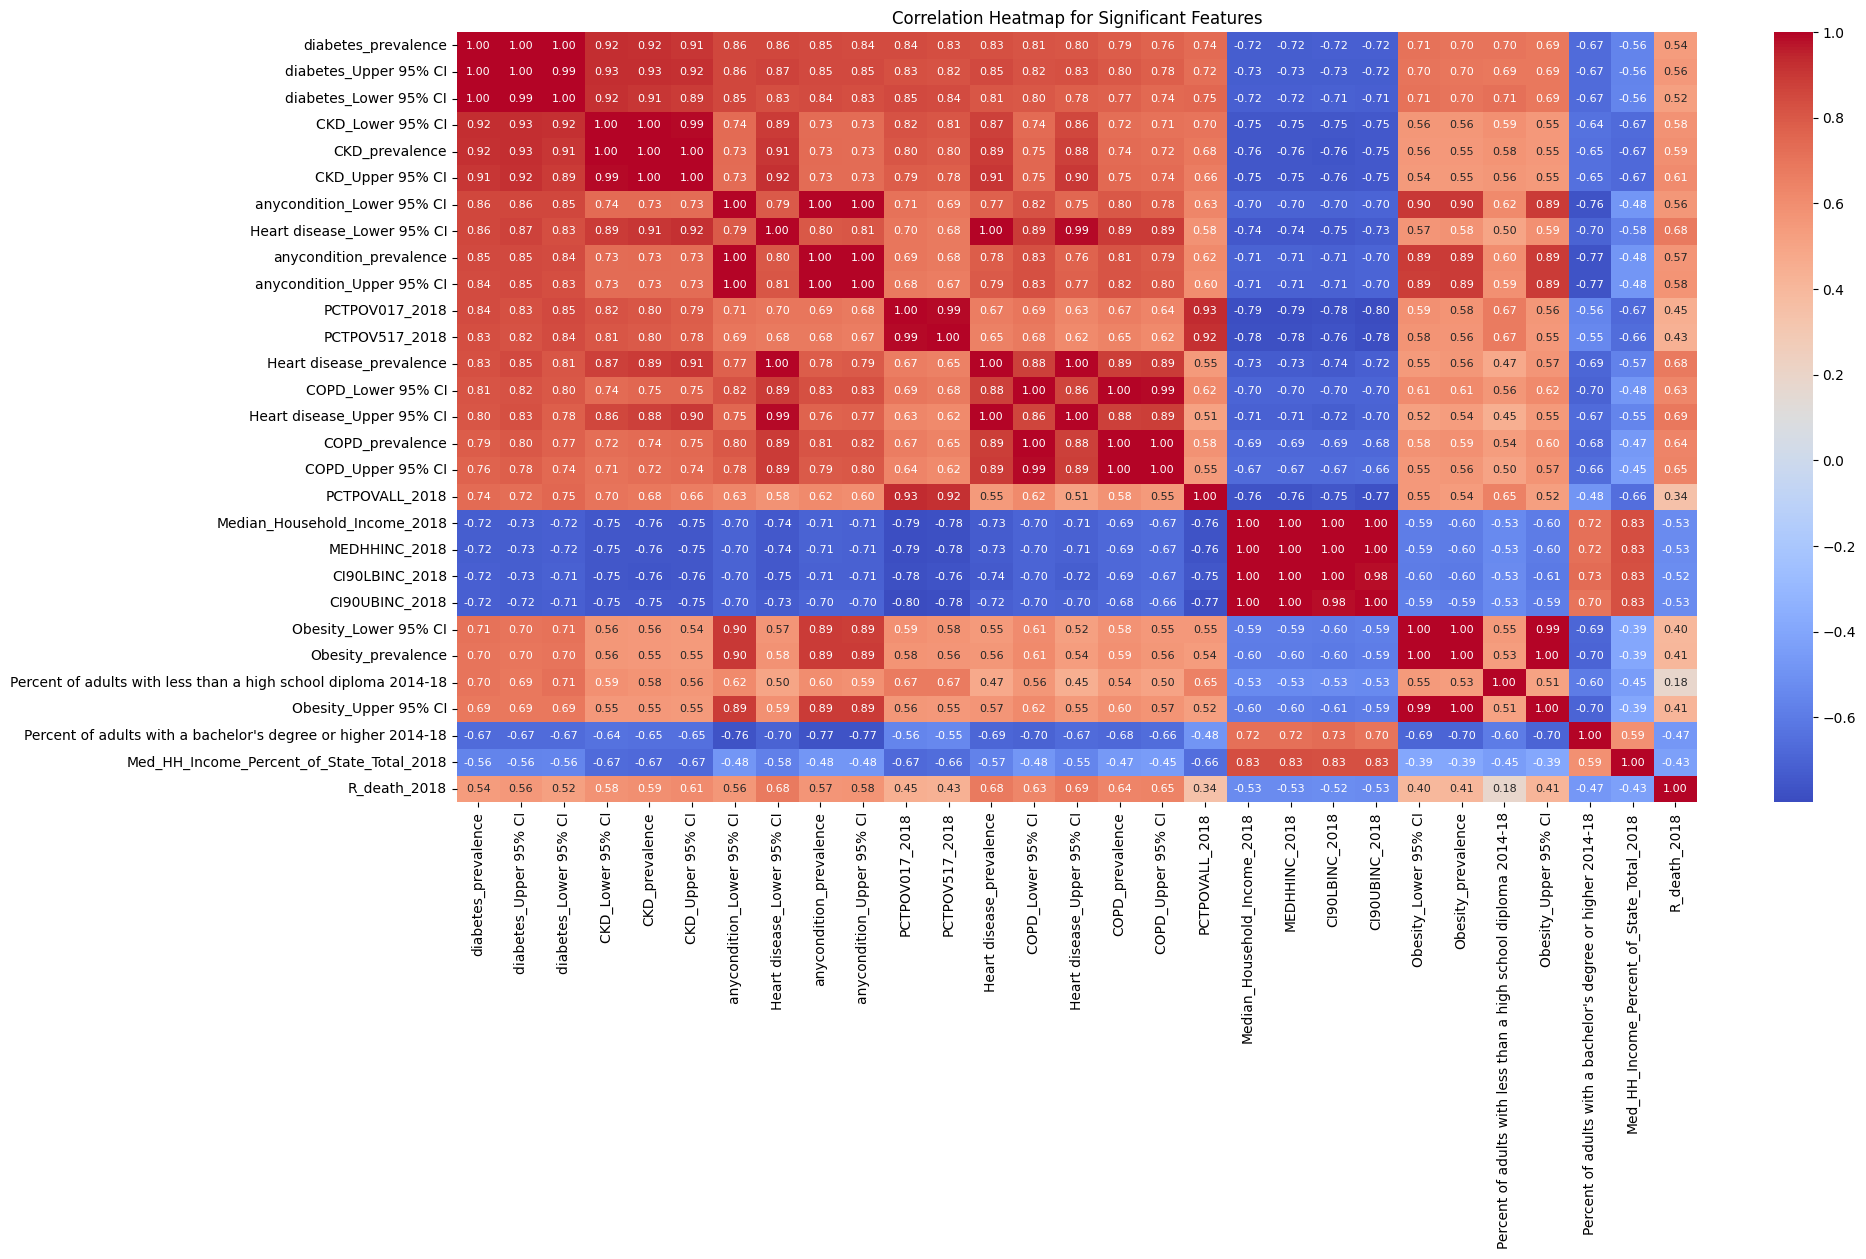

In [5]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Select a subset of the correlation matrix that has significant correlation to the target
significant_corr = corr_matrix.loc[:, 'diabetes_prevalence'].abs().sort_values(ascending=False)
significant_features = significant_corr[significant_corr > 0.5].index.tolist()  # Change the threshold as needed

# Create a heatmap with the subset of features
plt.figure(figsize=(20, 10))  # Adjust the figure size to fit the number of features
sns.heatmap(df_encoded[significant_features].corr(), cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Heatmap for Significant Features')
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.yticks(rotation=0)
plt.show()




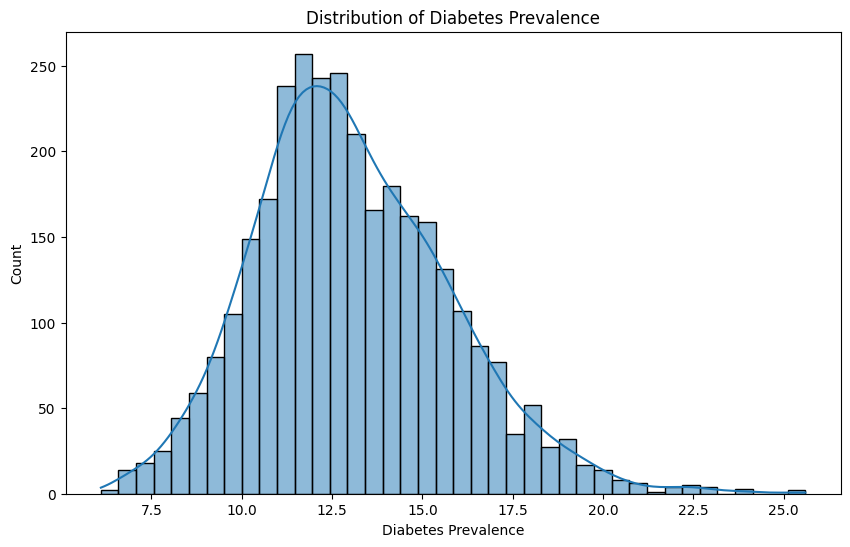

In [6]:
# Visualizing the distribution of the target variable 'diabetes_prevalence'
plt.figure(figsize=(10, 6))
sns.histplot(df['diabetes_prevalence'], kde=True)
plt.title('Distribution of Diabetes Prevalence')
plt.xlabel('Diabetes Prevalence')
plt.ylabel('Count')
plt.show()


In [7]:
# Separate features and target variable for encoded data
X_encoded = df_encoded.drop('diabetes_prevalence', axis=1)
y_encoded = df_encoded['diabetes_prevalence']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)





In [8]:
# Train the models on the scaled and encoded data
# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

# Fit the models
linear_model.fit(X_train_scaled, y_train_encoded)
ridge_model.fit(X_train_scaled, y_train_encoded)
lasso_model.fit(X_train_scaled, y_train_encoded)

Lasso()

In [9]:
# Define a function to compute evaluation metrics
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R^2': r2}

# Make predictions using the test set
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate metrics for each model
metrics_linear = compute_metrics(y_test_encoded, y_pred_linear)
metrics_ridge = compute_metrics(y_test_encoded, y_pred_ridge)
metrics_lasso = compute_metrics(y_test_encoded, y_pred_lasso)

# Print the evaluation metrics for each model
print("Linear Regression Metrics:")
for metric, value in metrics_linear.items():
    print(f"{metric}: {value:.4f}")

print("\nRidge Regression Metrics:")
for metric, value in metrics_ridge.items():
    print(f"{metric}: {value:.4f}")

print("\nLasso Regression Metrics:")
for metric, value in metrics_lasso.items():
    print(f"{metric}: {value:.4f}")


Linear Regression Metrics:
MSE: 6658278327700435238912.0000
RMSE: 81598274048.5388
MAE: 42286478008.6599
R^2: -827819537198254653440.0000

Ridge Regression Metrics:
MSE: 0.0030
RMSE: 0.0547
MAE: 0.0429
R^2: 0.9996

Lasso Regression Metrics:
MSE: 1.1236
RMSE: 1.0600
MAE: 0.8373
R^2: 0.8603
